In [49]:
#install PyPDF2 library
! pip install PyPDF2
#install nltk library
! pip install nltk==3.5
#install matplotlib library
! pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total number of pages in the PDF file is:  6
Author name: 
Creator name: LaTeX with hyperref
Producer name: pdfTeX-1.40.21
Words in the text:
 ['UNSUPERVISED', 'LEARNING', 'ALGORITHMS', 'FOR', 'KEYWORD', 'EXTRACTION', 'IN', 'UNDERGRADUATE', 'THESIS', 'Fred', 'Torres-Cruz', '*', ',', 'Edelfré', 'Flores', ',', 'William', 'E.', 'Arcaya', ',', 'Irenio', 'L.', 'Chagua', ',', 'Marga', 'I.', 'Ingaluque', 'Maestría', 'en', 'Ingeniería', 'de', 'Sistemas', 'Universidad', 'Nacional', 'del', 'Altiplano', 'Puno-', 'Perú', 'ftorres', '[', 'at', ']', 'unap.edu.pe', 'ABSTRACT', 'The', 'amount', 'of', 'data', 'managed', 'in', 'many', 'academic', 'institutions', 'has', 'increased', 'in', 'recent', 'years', ',', 'particularly', 'in', 'all', 'the', 'research', 'work', 'done', 'by', 'undergraduate', 'students', ',', 'who', 'simply', 'use', 'empirical', 'techniques', 'for', 'keyword', 'selection', ',', 'forgetting', 'existing', 'technical', 'methods', 'to', 'assist', 'their', 'students', 'in', 'this', 'proc

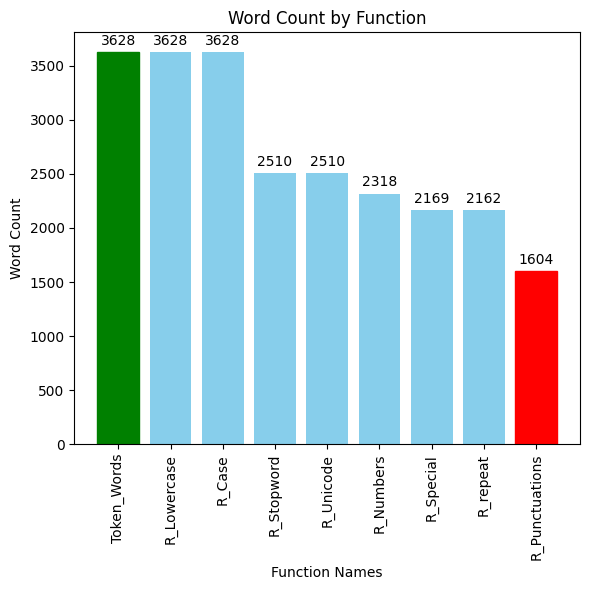

In [10]:
import PyPDF2
import nltk
import re
import pandas as pd
import matplotlib.pyplot as plt
from PyPDF2 import PdfReader
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

def textCleaner(pdf):
    # Function to show metadata of the PDF
   def metaData(pdf):
        reader = PdfReader(pdf)
        meta = reader.metadata
        # Print metadata of the PDF file
        print("Total number of pages in the PDF file is: ", len(reader.pages))
        print("Author name:", meta.author)
        print("Creator name:", meta.creator)
        print("Producer name:", meta.producer)
   metaData(pdf)
#----------------------------------------------------------------------------
    # Extract the entire text from the PDF file
   def extractText(pdf):
        text = ""
        reader = PdfReader(pdf)
        for page in reader.pages:
            text += page.extract_text()
        return text
   extracted_text = extractText(pdf)
#----------------------------------------------------------------------------------------
    # Tokenization - split the entire paragraph into words (tokens)
   def tokenWords(text):
        list_of_words = word_tokenize(text)
        print("Words in the text:\n", list_of_words)
        print("Number of words in the text:\n", len(list_of_words))
        return list_of_words
   split_words = tokenWords(extracted_text)
#--------------------------------------------------------------------------------  
    #Convert words in to lowercase
   def lowercaseWords(list_of_words):
      lower_case_remain =[]
      for i in list_of_words:
         x = i.lower()
         lower_case_remain.append(x) 
      return lower_case_remain
   lower_words = lowercaseWords(split_words)
#------------------------------------------------------------------------------------------
   #Remove cases.Remove some words and letters which are not in English language
   def removeCase(lower_case_remain):
      cleaned_texts =[]
      for text in lower_case_remain:
         text = text.casefold()
         cleaned_texts.append(text)
      return cleaned_texts
   cases = removeCase(lower_words)
#---------------------------------------------------------------------------------------
   #Stop words in Enlish language
   def removeStopword(cleaned_texts):
      stop_words = stopwords.words('english')
      stop_word_list = []
      nostop_word_list = []
      for word in cleaned_texts:
         if word in stop_words:
            stop_word_list.append(word)
         elif word not in stop_words:
            nostop_word_list.append(word)
      return nostop_word_list
   stop_words = removeStopword(cases) 
#-----------------------------------------------------------------------------------------------
   #Remove unicode symbols from the text
   def removeUnicode(nostop_word_list):
      no_unicode = []
      for word in nostop_word_list:
         cleaned_word = re.sub(r'[^\x00-\x7F]+', '', word)
         no_unicode.append(cleaned_word)
      return no_unicode
   uni_codes = removeUnicode(stop_words)
#----------------------------------------------------------------------------------------------
   #Remove numbers and digits
   def removeNumbers(no_unicode):
      no_number_list = []
      number_list = []
      for text in no_unicode:
         tokens = word_tokenize(text)
         contains_digit =  any(token.isdigit() or (token.count('.') == 1 and token.replace('.', '').isdigit()) for token in tokens)
   
         if not contains_digit:
            no_number_list.append(text)
         elif contains_digit:
            number_list.append(text)
      return no_number_list
   no_number = removeNumbers(uni_codes) 
#-------------------------------------------------------------------------------------------------
   #Remove special words with having mix of string, numbers, punctuations and other symbols
   def removeSpecial(no_special_list):
      no_sp_words = []
      num_string_list = []
      # Regular expression pattern to match any string containing numeric characters or hyphens
      pattern = r'^(?=.*\d)(?=.*[A-Za-z])|(?=.*[A-Za-z])(?=.*[\W_])|(?=.*\d)(?=.*[\W_])'
      for text in no_special_list:
         if not re.match(pattern, text):
            no_sp_words.append(text)
         elif re.match(pattern, text):
            num_string_list.append(text) 
      return no_sp_words
   No_Number = removeSpecial(no_number)
#---------------------------------------------------------------------------------------------
   #remove words with repetition numbers, punctuations, words and symbols
   def remove_repeat(no_sp_words):
      cleaned_tokens = []
      prev_word = None
      for token in no_sp_words:
      # Remove word repetitions
         if token != prev_word or token.isnumeric() or not re.match(r'^[A-Za-z]*$', token) or token.isdigit():
            cleaned_tokens.append(token)
            prev_word = token
         else:
            continue
      # Remove  repetitions
      cleaned_text = ' '.join(cleaned_tokens)
      cleaned_text = re.sub(r'([^\w\s])\1+', r'\1', cleaned_text)
      cleaned_text = re.sub(r'(\d)\1+', r'\1', cleaned_text)
      cleaned_words = cleaned_text.split()
      return cleaned_words
   clean_text = remove_repeat(No_Number)
#---------------------------------------------------------------------------------------------------
   #Remove punctuations from the list
   def removePunc(cleaned_words):
      punctuation_marks=[]
      without_punct_marks=[]
      for token in cleaned_words:
         if token in ("!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"):
            punctuation_marks.append(token)
         elif token not in ("!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"):
            without_punct_marks.append(token)
      print("Word list without punctuation marks:\n",without_punct_marks)
      print("Number of words without punctuation marks:\n",len(without_punct_marks))
      return without_punct_marks
   final_text = removePunc(clean_text)
#---------------------------------------------------------------------------------------
   #Calculation of the percentage
   def calculation():
      total_words = len(split_words)
      cleaned_words = len(final_text)
      Remain_percentage = (cleaned_words / total_words) * 100
      print("Total number of words before text cleaning is", total_words)
      print("Total number of words after text cleaning is", cleaned_words)
      print("The remaining percentage of the words is", round(Remain_percentage, 2), "%")
   calculation()
#----------------------------------------------------------------------------------------------
   def dataFrame():
      a = len(split_words)
      b = len(lower_words)
      c = len(cases)
      d = len(stop_words )
      e = len(uni_codes)
      f = len(no_number)
      g = len(No_Number)
      h = len(clean_text)
      i = len(final_text)
      function_names = ["Token_Words", "R_Lowercase", "R_Case", "R_Stopword","R_Unicode", "R_Numbers", "R_Special", "R_repeat", "R_Punctuations"]
      word_counts = [a,b,c,d,e,f,g,h,i]
      df = pd.DataFrame({"Function Name": function_names, "Word Count": word_counts})
      print(df)
      return df
   table = dataFrame()
#---------------------------------------------------------------------------------------------
   def plotWordCountBarGraph(df):
      plt.figure(figsize=(6,6))
      bars = plt.bar(df["Function Name"], df["Word Count"], color='skyblue')
      plt.xlabel('Function Names')
      plt.ylabel('Word Count')
      plt.title('Word Count by Function')
      plt.xticks(rotation=90)
    # maximum and minimum values of x values
      max_idx = df["Word Count"].idxmax()
      min_idx = df["Word Count"].idxmin()
    # Highlight the maximum and minimum values 
      bars[max_idx].set_color('green')
      bars[min_idx].set_color('red')
    # Labeling the bars with their respective values
      for bar in bars:
         height = bar.get_height()
         plt.annotate(f'{height}',xy=(bar.get_x() + bar.get_width() / 2, height),xytext=(0, 3),  textcoords="offset points",ha='center', va='bottom')
      plt.tight_layout()
      plt.show()
   plotWordCountBarGraph(table)

textCleaner("Unsupervised_Learning_Algorithms_for_Keyword_Extra.pdf")

     

Total number of pages in the PDF file is:  85
Author name: Jie Shan and Charles K. Toth
Creator name: Adobe InDesign CC 2017 (Windows)
Producer name: Adobe PDF Library 15.0
Words in the text:
 ['Topographic', 'Laser', 'Ranging', 'and', 'Scanning', 'Topographic', 'Laser', 'Ranging', 'and', 'Scanning', 'Principles', 'and', 'Processing', ',', 'Second', 'Edition', 'Edited', 'by', 'Jie', 'Shan', 'Charles', 'K.', 'TothCRC', 'Press', 'Taylor', '&', 'Francis', 'Group', '6000', 'Broken', 'Sound', 'Parkway', 'NW', ',', 'Suite', '300', 'Boca', 'Raton', ',', 'FL', '33487-2742', '©', '2018', 'by', 'Taylor', '&', 'Francis', 'Group', ',', 'LLC', 'CRC', 'Press', 'is', 'an', 'imprint', 'of', 'Taylor', '&', 'Francis', 'Group', ',', 'an', 'Informa', 'business', 'No', 'claim', 'to', 'original', 'U.S.', 'Government', 'works', 'Printed', 'on', 'acid-free', 'paper', 'International', 'Standard', 'Book', 'Number-13', ':', '978-1-4987-7227-3', '(', 'Hardback', ')', 'This', 'book', 'contains', 'information', 'ob

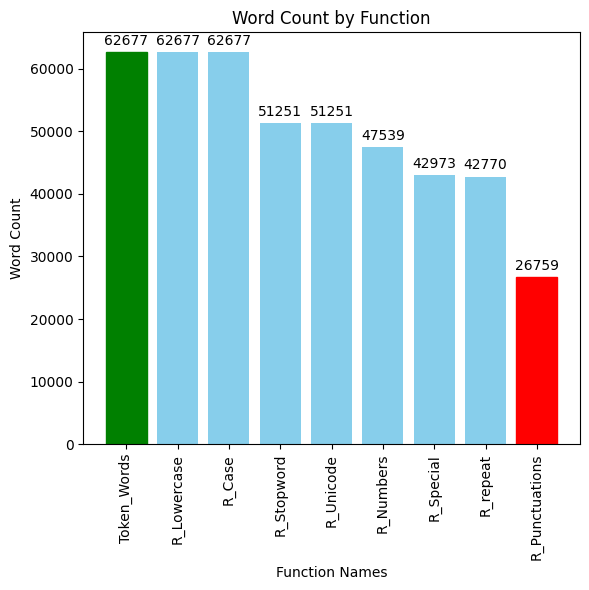

In [11]:
textCleaner("9781315154381_previewpdf.pdf")

Total number of pages in the PDF file is:  2
Author name: Dell
Creator name: Microsoft® Word 2010
Producer name: Microsoft® Word 2010
Words in the text:
 ['Geographic', 'Information', 'Systems', ',', 'commonly', 'known', 'as', 'GIS', ',', 'have', 'revolutionized', 'the', 'way', 'we', 'analyze', 'and', 'interpret', 'spatial', 'data', '.', '🌍', 'The', 'power', 'of', 'GIS', 'lies', 'in', 'its', 'ability', 'to', 'process', 'vast', 'amounts', 'of', 'geographical', 'information', ',', 'providing', 'valuable', '^', 'insights', 'for', 'various', 'i', 'ndustries', ',', 'including', 'urban', 'planning', ',', 'environmental', 'management', ',', 'and', 'disaster', 'response', '.', '🗺️', '\\t\\tA', 'text\\t\\t\\t\\n\\n', 'sample', 'and', '@', 'kandy', 'GIS', 'is', 'not', 'a', 'recent', 'innovation', ';', 'its', 'roots', 'can', 'be', 'traced', 'back', 'to', 'the', '1960s', 'when', 'early', 'computer', 'systems', 'were', 'used', 'to', 'store', 'and', 'analyze', 'Google', 'geographical', ':', 'data', 

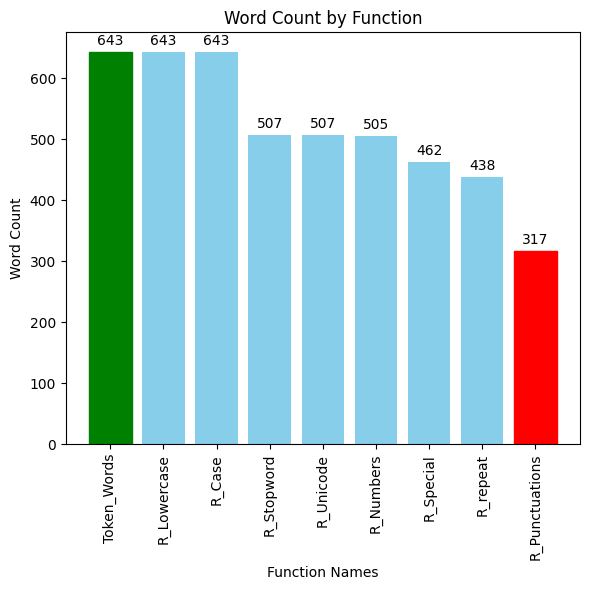

In [12]:
textCleaner("Geographic Information Systems.pdf")

Total number of pages in the PDF file is:  3
Author name: Springer-Verlag GmbH & Co. KG
Creator name: 3B2 Total Publishing System 8.05a/W
Producer name: Acrobat Distiller 5.0 (Windows)
Words in the text:
 ['Geographic', 'Information', 'Systems', '(', 'GIS', ')', 'are', 'now', 'widely', 'accepted', 'as', 'powerful', 'and', 'integrated', 'tools', 'for', 'storing', ',', 'manipulating', ',', 'visualizing', ',', 'and', 'analyzing', 'spatial', 'data', '.', 'As', 'a', 'new', 'and', 'emerging', 'technology', 'in', 'the', 'early', '1970s', ',', 'GIS', 'had', 'a', 'profound', 'inﬂuence', 'on', 'the', 'capabilities', 'of', 'geographic', 'analysis', ',', 'and', 'in', 'retrospect', 'marked', 'a', 'turning', 'point', 'in', 'the', 'reinforcement', 'of', 'geography', 'as', 'an', 'explicitly', 'spatial', 'discipline', '.', 'Also', ',', 'at', 'that', 'time', 'and', 'on', 'a', 'parallel', 'course', ',', 'ArpaNet', '–', 'the', 'ﬁrst', 'established', 'prototype', 'of', 'the', 'Internet', 'networking', 'sys

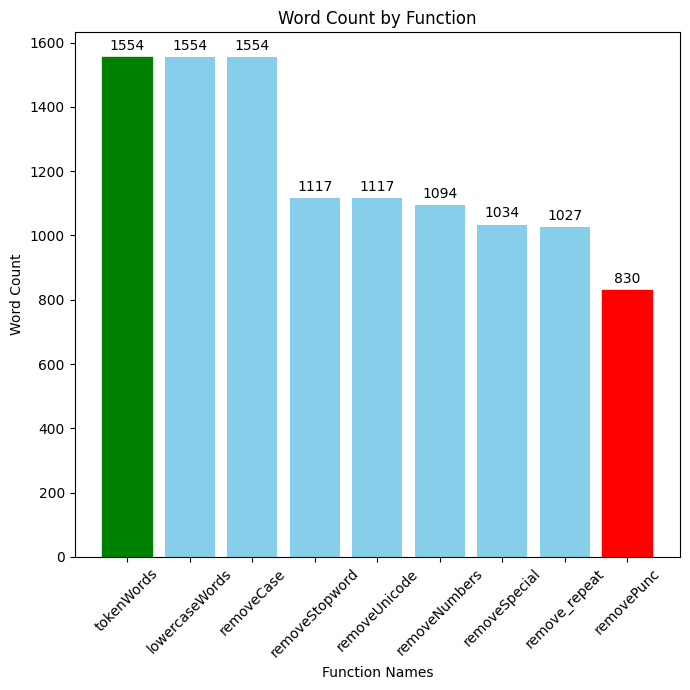

In [7]:
textCleaner("s10109-004-0133-4.pdf")